In [1]:
import scipy as sp
from scipy import signal
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyaudio


In [2]:
# 1. Type 1 FIR Filter
def Type1FIR(N, ws, As):
    M = int((N-1)/2)
    L = ws.size
    C = np.ones((ws.size, M+1))
    for i in range(0, M):
        for j in range(0, L):
            wk = ws[j]
            C[j,i] = 2*np.cos(wk*(M-i)) 
    C_pinv = numpy.linalg.pinv(C)
    h1 = np.dot(C_pinv,As)
    h2 = np.zeros((h1.size-1))
    for i in range(0, M):
        h2[i] = h1[M-i-1]
    h = np.concatenate((h1, h2))
    return h
 

[ 4.41591657e-03  8.49359824e-03  4.64473180e-05 -8.59130045e-03
 -4.18567698e-03  6.78415248e-03  1.10842119e-02  9.74245870e-03
  9.92961364e-03  8.23932165e-03 -5.79293704e-04 -9.72258648e-03
 -1.16613325e-02 -1.14136693e-02 -1.30272700e-02 -7.89679237e-03
  6.35034087e-03  1.25424094e-02  4.64906780e-05 -1.30850306e-02
 -6.56934922e-03  1.03284120e-02  1.72855558e-02  1.55447945e-02
  1.62435964e-02  1.38433507e-02 -5.79169901e-04 -1.61260725e-02
 -1.99082918e-02 -2.00827510e-02 -2.36382596e-02 -1.48520805e-02
  1.17277550e-02  2.42177125e-02  4.65166753e-05 -2.71712867e-02
 -1.44061168e-02  2.25965466e-02  4.00225172e-02  3.82217670e-02
  4.27585434e-02  3.93726408e-02 -5.79108022e-04 -5.18035499e-02
 -7.21335342e-02 -8.42231186e-02 -1.19131845e-01 -9.59926031e-02
  1.03179074e-01  4.09591044e-01  5.62546525e-01  4.09591044e-01
  1.03179074e-01 -9.59926031e-02 -1.19131845e-01 -8.42231186e-02
 -7.21335342e-02 -5.18035499e-02 -5.79108022e-04  3.93726408e-02
  4.27585434e-02  3.82217

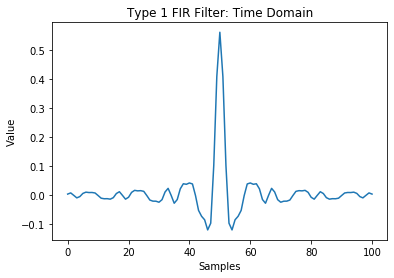

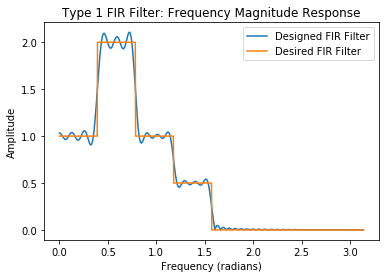

In [11]:
# 2. Creating an arbitrary amplitude FIR Type 1 Filter
# Defining desired values
N = 101
L = 1000
ws = np.linspace(0, np.pi, L)
As = np.zeros((ws.size))

for i in range(0, ws.size):
    if ws[i] >= 0 and ws[i] < np.pi/8:
        As[i] = 1
    elif ws[i] >= np.pi/8 and ws[i] < np.pi/4:
        As[i] = 2
    elif ws[i] >= np.pi/4 and ws[i] < 3*np.pi/8:
        As[i] = 1
    elif ws[i] >= 3*np.pi/8 and ws[i] < np.pi/2:
        As[i] = 0.5
    else:
        As[i] = 0

# Calculating Time Domain Filter
h = Type1FIR(N, ws, As)        

# Time domain plot
fig1=plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(h)
ax1.set_title("Type 1 FIR Filter: Time Domain")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Value")

# Frequency domain plot
freq, f = signal.freqz(h)

fig2=plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(freq, abs(f), label="Designed FIR Filter")
ax2.plot(ws, As, label="Desired FIR Filter")
ax2.set_title("Type 1 FIR Filter: Frequency Magnitude Response")
ax2.set_xlabel("Frequency (radians)")
ax2.set_ylabel("Amplitude")
ax2.legend()


[-2.52280789e-03 -1.35919507e-03 -8.89379114e-05  1.23174186e-03
  2.56612045e-03  3.85167230e-03  5.04873524e-03  6.09543914e-03
  6.95648217e-03  7.57804628e-03  7.93643312e-03  7.99271340e-03
  7.74097662e-03  7.16248391e-03  6.27332497e-03  5.07789902e-03
  3.61584118e-03  1.91473712e-03  3.62717131e-05 -1.97181999e-03
 -4.03032838e-03 -6.07727846e-03 -8.02307859e-03 -9.79969503e-03
 -1.13161409e-02 -1.25078522e-02 -1.32922296e-02 -1.36179143e-02
 -1.34200767e-02 -1.26692912e-02 -1.13262845e-02 -9.39014755e-03
 -6.85231480e-03 -3.74392391e-03 -8.88859021e-05  4.04969623e-03
  8.61739951e-03  1.35229777e-02  1.86870929e-02  2.39975894e-02
  2.93588944e-02  3.46478324e-02  3.97634191e-02  4.45829081e-02
  4.90116496e-02  5.29390287e-02  5.62880452e-02  5.89708112e-02
  6.09375391e-02  6.21313143e-02  6.25362457e-02  6.21313143e-02
  6.09375391e-02  5.89708112e-02  5.62880452e-02  5.29390287e-02
  4.90116496e-02  4.45829081e-02  3.97634191e-02  3.46478324e-02
  2.93588944e-02  2.39975

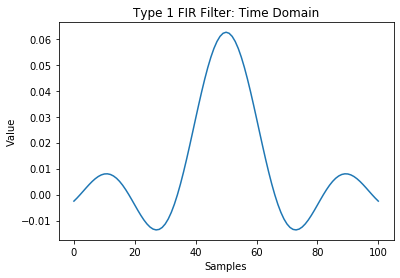

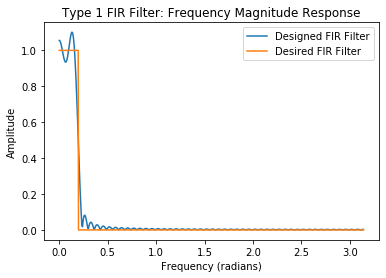

In [12]:
# 3. Calculating Low Pass Filter Parameters
N = 101
L = 1000
ws = np.linspace(0, np.pi, L)
As = np.zeros((ws.size))

for i in range(0, ws.size):
    if ws[i] >= 0 and ws[i] < np.pi/16:
        As[i] = 1
    else:
        As[i] = 0

# Calculating Time Domain Filter
h = Type1FIR(N, ws, As)        
print(h)
# Time domain plot
fig1=plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(h)
ax1.set_title("Type 1 FIR Filter: Time Domain")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Value")

# Frequency domain plot
freq, f = signal.freqz(h)

fig2=plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(freq, abs(f), label="Designed FIR Filter")
ax2.plot(ws, As, label="Desired FIR Filter")
ax2.set_title("Type 1 FIR Filter: Frequency Magnitude Response")
ax2.set_xlabel("Frequency (radians)")
ax2.set_ylabel("Amplitude")
ax2.legend()


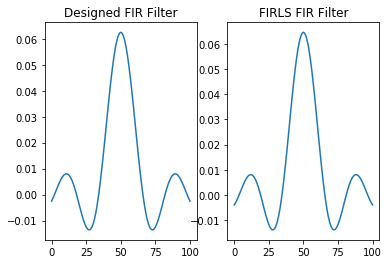

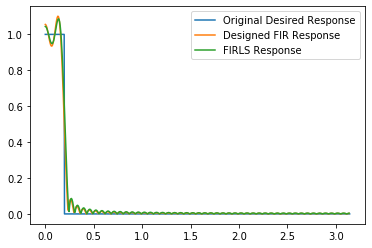

In [5]:
# 4. FIRLS designed filter
numtaps = 101
fs = 2
desired = (1, 1, 0, 0)
bands = (0, 1/16, 1/15, 1)
h_firls = signal.firls(numtaps, bands, desired, fs=fs)

# FIRLS Time Domain Plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(h)
ax1.set_title("Designed FIR Filter")
ax2.plot(h_firls)
ax2.set_title("FIRLS FIR Filter")

# FIRLS Frequency Domain Plot
freq_firls, f_firls = signal.freqz(h_firls)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ws, As, label="Original Desired Response")
ax1.plot(freq, abs(f), label="Designed FIR Response")
ax1.plot(freq_firls,abs(f_firls), label="FIRLS Response")

ax1.legend()


In [6]:
# 5. Applying FIR filter to Corcovado file
corcovadoFs, corcovadoDataAll = wavfile.read('./HW3-Files/Corcovado.wav')

corcovado0 = corcovadoDataAll[:,0]/max(corcovadoDataAll[:,0])
corcovado1 = corcovadoDataAll[:,1]/max(corcovadoDataAll[:,1])

r0 = np.convolve(corcovado0, h)
r1 = np.convolve(corcovado1, h)

# Initializing audio stream using pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, rate=corcovadoFs,
                channels=1, output=True, output_device_index=1)

# Sending filtered corcovado sound to stream
data = r0.astype(np.float32).tostring()
# stream.write(data)

# We hear, in the filtered data compared to the original file,
# That much of the detail is attenuated (e.g. snare drum, voice inflections)
# And the result is overall muted. However, we do see a reduction in static due to 
# the attenuation of much noise as much signal power is removed by the filter

FileNotFoundError: [Errno 2] No such file or directory: './HW3-Files/Corcovado.wav'

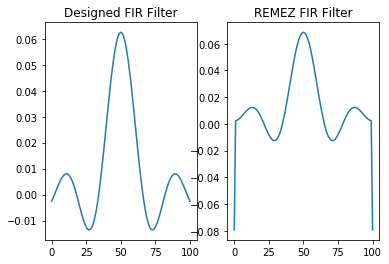

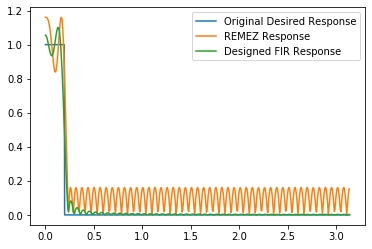

In [7]:
# 6. REMEZ designed filter
numtaps = 101
fs = 2
desired = (1, 0)
tran_width = 1/100
bands = (0, 1/16, 1/16+tran_width, 1)

# REMEZ Time Domain Plot
h_remez = signal.remez(numtaps, bands, desired, fs=fs)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(h)
ax1.set_title("Designed FIR Filter")
ax2.plot(h_remez)
ax2.set_title("REMEZ FIR Filter")

# REMEZ Frequency Domain Plot
freq_remez, f_remez = signal.freqz(h_remez)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ws, As, label="Original Desired Response")
ax1.plot(freq_remez, abs(f_remez), label="REMEZ Response")
ax1.plot(freq, abs(f), label="Designed FIR Response")

ax1.legend()

# We see that the remez designed filter has significantly more ripple than our 
# least squares designed FIR repsonse

In [8]:
# 7. Applying remez filter to Corcovado file
corcovadoFs, corcovadoDataAll = wavfile.read('./HW3-Files/Corcovado.wav')

corcovado0 = corcovadoDataAll[:,0]/max(corcovadoDataAll[:,0])
corcovado1 = corcovadoDataAll[:,1]/max(corcovadoDataAll[:,1])

r0_rem = np.convolve(corcovado0, h_remez)
r1_rem = np.convolve(corcovado1, h_remez)

# Initializing audio stream using pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, rate=corcovadoFs,
                channels=1, output=True, output_device_index=1)

# Sending remez filtered corcovado sound to stream
data = r0_rem.astype(np.float32).tostring()
# stream.write(data)

# Due to the ripples in the higher frequency regions, the higher frequency sounds is attenuated less
# so this filter leaves more of the higher frequency signal than the previous.
# For example, the lyrics are less muffled than the previous filter

FileNotFoundError: [Errno 2] No such file or directory: './HW3-Files/Corcovado.wav'

Text(0.5, 0, 'Frequency (radians)')

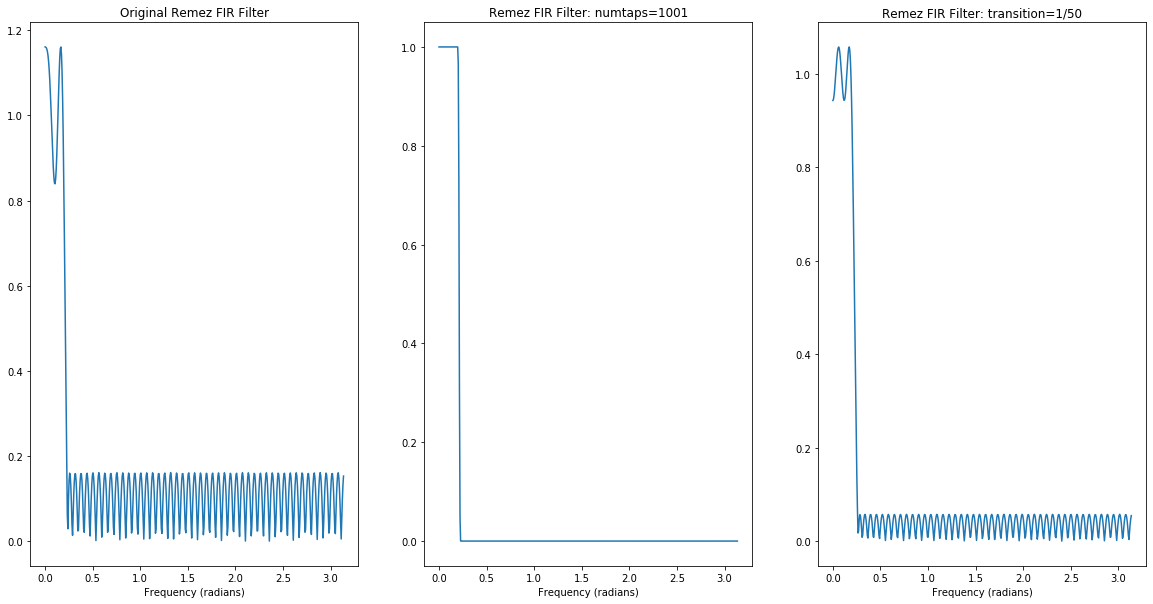

In [9]:
# 8: Remez taps, ripple, and transition width

# Original
numtaps = 101
fs = 2
desired = (1, 0)
bands = (0, 1/16, 1/16+tran_width, 1)
tran_width = 1/100

# Increasing number of taps
h_remeztaps = signal.remez(1001, bands, desired, fs=fs)
freq_remeztaps, f_remeztaps = signal.freqz(h_remeztaps)

# Decreasing transition width number of taps
tran_width_edit = 1/50
bands_edit = (0, 1/16, 1/16+tran_width_edit, 1)
h_remeztran = signal.remez(numtaps, bands_edit, desired, fs=fs)
freq_remeztran, f_remeztran = signal.freqz(h_remeztran)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(freq_remez, abs(f_remez))
ax2.plot(freq_remeztaps, abs(f_remeztaps))
ax3.plot(freq_remeztran, abs(f_remeztran))

ax1.set_title("Original Remez FIR Filter")
ax2.set_title("Remez FIR Filter: numtaps=1001")
ax3.set_title("Remez FIR Filter: transition=1/50")

ax1.set_xlabel("Frequency (radians)")
ax2.set_xlabel("Frequency (radians)")
ax3.set_xlabel("Frequency (radians)")

# We see that, compared to the original Remez filter, increasing the number of
# taps reduces ripples and reduces causes the filter to approach an ideal filter

# Increasing the transition width causes a slower fall from 1 to 0, however the advantage
# is smaller ripples with the same number of taps


In [10]:
# 9: Creating a filter to only capture bass noise
corcovado0 = corcovadoDataAll[:,0]/max(corcovadoDataAll[:,0])
corcovado1 = corcovadoDataAll[:,1]/max(corcovadoDataAll[:,1])

# Tune this to only play a percentage of the file (easier for testing)
percStart = 80
percEnd = 85
trim = corcovado0[int(corcovado0.size*percStart/100):int(corcovado0.size*percEnd/100)]

# Defining filter parameters
N = 501
L = 1000
ws = np.linspace(0, np.pi, L)
As = np.zeros((ws.size))
cutoff = 500 # use this to tune the curoff frequency: 500Hz is approximate bass cutoff
w_cut = np.pi*cutoff/corcovadoFs

# Defining desired response
for i in range(0, ws.size):
    if ws[i] >= 0 and ws[i] < w_cut:
        As[i] = 1
    else:
        As[i] = 0

# Creating Bass filter
h_bass = Type1FIR(N, ws, As)

# Plotting Frequency Response
freq_bass, f_bass = signal.freqz(h_bass)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Frequency response of bass isolating filter")
plt.plot(freq_bass, abs(f_bass))
ax1.set_xlabel("Frequency (radians)")

# Filtering
r0_bass = np.convolve(trim, h_bass)

# Initializing audio stream using pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, rate=corcovadoFs,
                channels=1, output=True, output_device_index=1)

# Sending remez filtered corcovado sound to stream
data = r0_bass.astype(np.float32).tostring()
# stream.write(data)

# A least-squares 501 point, 500Hz cutoff filter attenuates all notes leaving mostly just the slow, bass tone

NameError: name 'corcovadoDataAll' is not defined